# Naive Bayes Classifier

Pada bagian ini, kita akan melakukan perbandingan performa algoritma **Naive Bayes** sebelum dan sesudah penerapan SMOTE:

## **Tujuan**:
1. **Mengukur performa** klasifikasi pada data yang tidak seimbang (original)
2. **Mengukur performa** klasifikasi pada data yang sudah diseimbangkan dengan SMOTE
3. **Membandingkan akurasi** dan metrik evaluasi lainnya (precision, recall, F1-score)
4. **Menganalisis dampak SMOTE** terhadap performa model klasifikasi

## **Metodologi**:
- Menggunakan **train-test split** yang konsisten untuk perbandingan yang fair
- Mengevaluasi dengan **multiple metrics**: Accuracy, Precision, Recall, F1-Score
- Membuat **confusion matrix** untuk analisis detail
- Visualisasi perbandingan hasil

C:\Users\ideapad\AppData\Local\Temp\ipykernel_22852\584279652.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM psd.Iris", conn)



Isi tabel iris:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0     36              5             3              1             0   
1     37              6             4              1             0   
2     38              5             3              2             0   
3     39              4             3              1             0   
4     40              5             3              2             0   
..   ...            ...           ...            ...           ...   
110  146              7             3              5             2   
111  147              6             3              5             2   
112  148              7             3              5             2   
113  149              6             3              5             2   
114  150              6             3              5             2   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..        

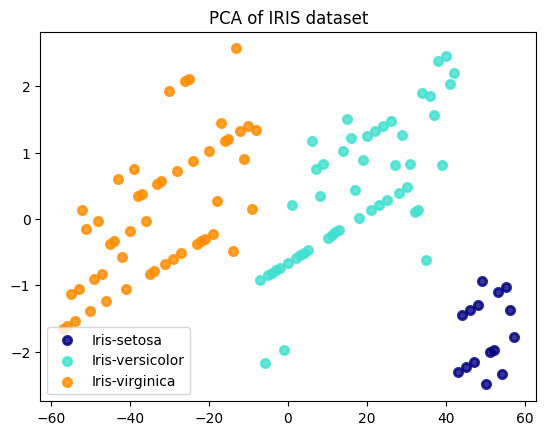

Distribusi kelas sebelum SMOTE:
Counter({'Iris-versicolor': 50, 'Iris-virginica': 50, 'Iris-setosa': 15})
Total sampel sebelum SMOTE: 115
Jumlah fitur: 5
Distribusi kelas setelah SMOTE:
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
Total sampel setelah SMOTE: 150

Contoh data sintetis yang dihasilkan SMOTE:
     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
140  48              5             3              1             0  Iris-setosa
141  37              5             3              1             0  Iris-setosa
142  37              5             3              1             0  Iris-setosa
143  48              5             3              1             0  Iris-setosa
144  46              5             3              1             0  Iris-setosa
145  36              5             3              1             0  Iris-setosa
146  41              5             3              1             0  Iris-setosa
147  47              5         

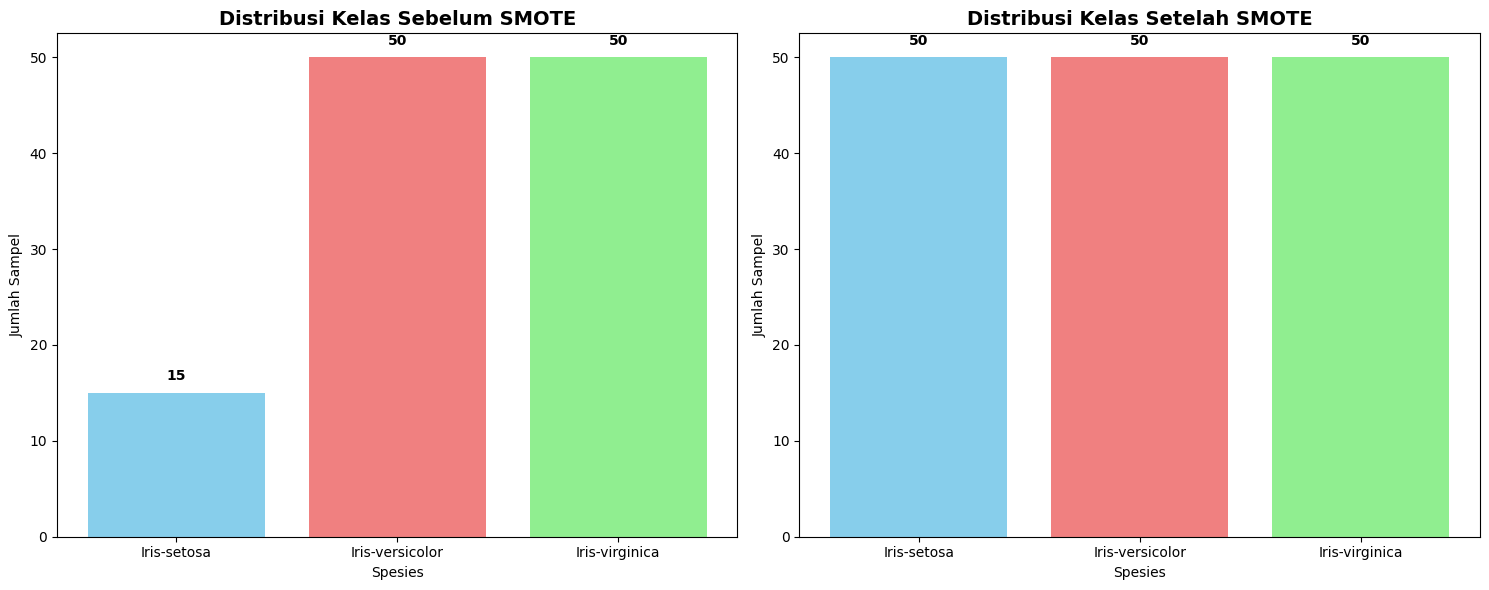


Tabel Perbandingan:
           Spesies  Sebelum SMOTE  Setelah SMOTE  Sampel Sintetis Ditambahkan
0      Iris-setosa             15             50                           35
1  Iris-versicolor             50             50                            0
2   Iris-virginica             50             50                            0
VISUALISASI PCA DATA SETELAH SMOTE


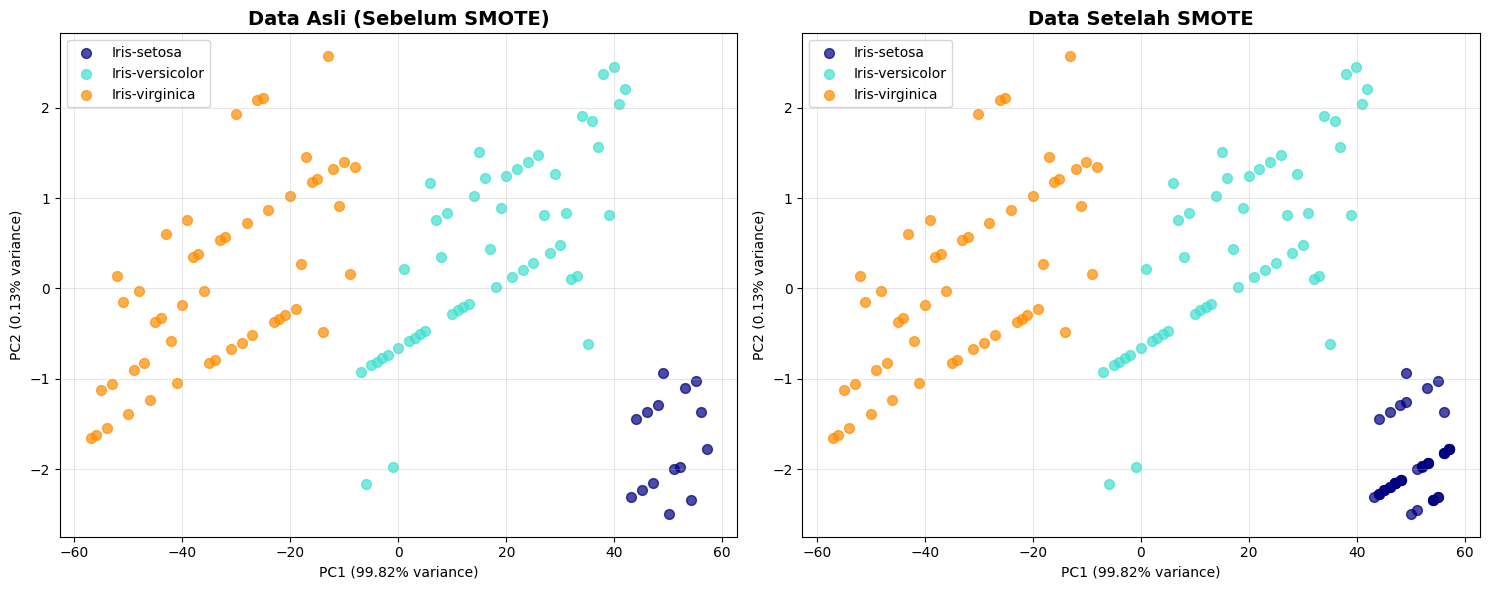

RINGKASAN HASIL SMOTE
• Data asli: 115 sampel dengan ketidakseimbangan kelas
• Data setelah SMOTE: 150 sampel dengan kelas yang seimbang
• Sampel sintetis yang dihasilkan: 35 sampel
• Semua kelas sekarang memiliki 50 sampel


In [1]:
%run overSampling.ipynb

## Persiapan Data untuk Klasifikasi

**Langkah-langkah**:
1. **Import libraries** yang diperlukan untuk klasifikasi dan evaluasi
2. **Menyiapkan train-test split** untuk data original dan data SMOTE
3. **Menggunakan stratified sampling** untuk mempertahankan proporsi kelas
4. **Konsistensi random_state** untuk reproducibility hasil

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

print("PERSIAPAN DATA UNTUK KLASIFIKASI NAIVE BAYES")

RANDOM_STATE = 42

# 1. Persiapkan data original (sebelum SMOTE)
print("\n1. Data Original (Sebelum SMOTE):")
X_original = df.drop('Species', axis=1)
y_original = df['Species']

print(f"   - Jumlah sampel: {len(X_original)}")
print(f"   - Jumlah fitur: {X_original.shape[1]}")
print(f"   - Distribusi kelas: {dict(Counter(y_original))}")

# Train-test split untuk data original
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.3, random_state=RANDOM_STATE, 
    stratify=y_original
)

print(f"   - Training set: {X_train_orig.shape[0]} sampel")
print(f"   - Test set: {X_test_orig.shape[0]} sampel")

# 2. Persiapkan data setelah SMOTE
print("\n2. Data Setelah SMOTE:")
print(f"   - Jumlah sampel: {len(X_resampled)}")
print(f"   - Jumlah fitur: {X_resampled.shape[1]}")
print(f"   - Distribusi kelas: {dict(Counter(y_resampled))}")

# Train-test split untuk data SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=RANDOM_STATE, 
    stratify=y_resampled
)

print(f"   - Training set: {X_train_smote.shape[0]} sampel")
print(f"   - Test set: {X_test_smote.shape[0]} sampel")

PERSIAPAN DATA UNTUK KLASIFIKASI NAIVE BAYES

1. Data Original (Sebelum SMOTE):
   - Jumlah sampel: 115
   - Jumlah fitur: 5
   - Distribusi kelas: {'Iris-setosa': 15, 'Iris-versicolor': 50, 'Iris-virginica': 50}
   - Training set: 80 sampel
   - Test set: 35 sampel

2. Data Setelah SMOTE:
   - Jumlah sampel: 150
   - Jumlah fitur: 5
   - Distribusi kelas: {'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}
   - Training set: 120 sampel
   - Test set: 30 sampel


## Klasifikasi Naive Bayes pada Data Original

**Implementasi Gaussian Naive Bayes** pada dataset Iris yang **belum diseimbangkan**:

### **Parameter Model**:
- **Algorithm**: Gaussian Naive Bayes (cocok untuk continuous features)
- **Assumption**: Features mengikuti distribusi normal
- **No hyperparameter tuning**: Menggunakan default parameters untuk baseline comparison

### **Evaluasi**:
- **Accuracy**: Proporsi prediksi yang benar
- **Precision**: True Positive / (True Positive + False Positive)  
- **Recall**: True Positive / (True Positive + False Negative)
- **F1-Score**: Harmonic mean dari Precision dan Recall

KLASIFIKASI NAIVE BAYES PADA DATA ORIGINAL (SEBELUM SMOTE)

HASIL EVALUASI MODEL PADA DATA ORIGINAL:
Accuracy:  1.0000 (100.00%)
Precision: 1.0000 (100.00%)
Recall:    1.0000 (100.00%)
F1-Score:  1.0000 (100.00%)


CLASSIFICATION REPORT DETAIL:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        35
      macro avg       1.00      1.00      1.00        35
   weighted avg       1.00      1.00      1.00        35

CONFUSION MATRIX:


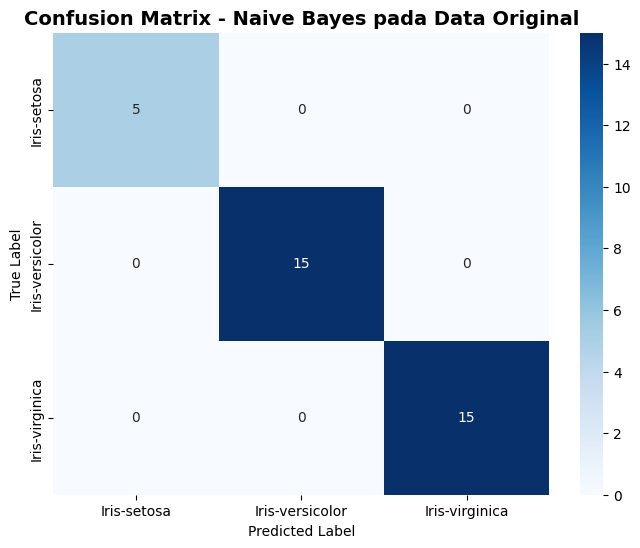


RINGKASAN PERFORMA DATA ORIGINAL:
• Total sampel training: 80
• Total sampel testing: 35
• Akurasi: 100.00%
• Model berhasil mengklasifikasikan 35 dari 35 sampel dengan benar


In [3]:
print("KLASIFIKASI NAIVE BAYES PADA DATA ORIGINAL (SEBELUM SMOTE)")

# 1. Inisialisasi dan training model Naive Bayes
nb_original = GaussianNB()
nb_original.fit(X_train_orig, y_train_orig)

# 2. Prediksi pada test set
y_pred_orig = nb_original.predict(X_test_orig)

# 3. Evaluasi performa
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
precision_orig = precision_score(y_test_orig, y_pred_orig, average="weighted")
recall_orig = recall_score(y_test_orig, y_pred_orig, average="weighted")
f1_orig = f1_score(y_test_orig, y_pred_orig, average="weighted")

print(f"\nHASIL EVALUASI MODEL PADA DATA ORIGINAL:")
print(f"Accuracy:  {accuracy_orig:.4f} ({accuracy_orig*100:.2f}%)")
print(f"Precision: {precision_orig:.4f} ({precision_orig*100:.2f}%)")
print(f"Recall:    {recall_orig:.4f} ({recall_orig*100:.2f}%)")
print(f"F1-Score:  {f1_orig:.4f} ({f1_orig*100:.2f}%)")

print(f"\n\nCLASSIFICATION REPORT DETAIL:")
print(classification_report(y_test_orig, y_pred_orig))

# 4. Confusion Matrix
print("CONFUSION MATRIX:")
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_orig,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=nb_original.classes_,
    yticklabels=nb_original.classes_,
)
plt.title(
    "Confusion Matrix - Naive Bayes pada Data Original",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"\n{'='*70}")
print("RINGKASAN PERFORMA DATA ORIGINAL:")
print(f"• Total sampel training: {len(X_train_orig)}")
print(f"• Total sampel testing: {len(X_test_orig)}")
print(f"• Akurasi: {accuracy_orig*100:.2f}%")
print(
    f"• Model berhasil mengklasifikasikan {int(accuracy_orig * len(X_test_orig))} dari {len(X_test_orig)} sampel dengan benar"
)
print("=" * 70)

## Klasifikasi Naive Bayes pada Data SMOTE

**Implementasi Gaussian Naive Bayes** pada dataset Iris yang **sudah diseimbangkan dengan SMOTE**:

### **Keuntungan SMOTE untuk Naive Bayes**:
1. **Balanced Training**: Semua kelas memiliki representasi yang sama
2. **Reduced Bias**: Model tidak bias terhadap kelas mayoritas
3. **Better Generalization**: Training dengan lebih banyak sampel sintetis
4. **Improved Minority Class Detection**: Performa lebih baik pada kelas minoritas

### **Expected Improvements**:
- Peningkatan recall untuk kelas minoritas
- Performa yang lebih seimbang across all classes
- Potential slight decrease pada overall accuracy (trade-off yang normal)

KLASIFIKASI NAIVE BAYES PADA DATA SMOTE (SETELAH SMOTE)

HASIL EVALUASI MODEL PADA DATA SMOTE:
Accuracy:  1.0000 (100.00%)
Precision: 1.0000 (100.00%)
Recall:    1.0000 (100.00%)
F1-Score:  1.0000 (100.00%)


CLASSIFICATION REPORT DETAIL:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

CONFUSION MATRIX:


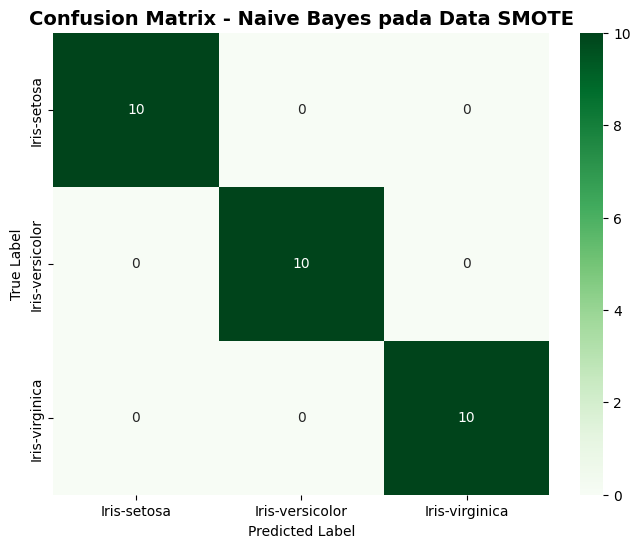


RINGKASAN PERFORMA DATA SMOTE:
• Total sampel training: 120
• Total sampel testing: 30
• Akurasi: 100.00%
• Model berhasil mengklasifikasikan 30 dari 30 sampel dengan benar


In [4]:
print("KLASIFIKASI NAIVE BAYES PADA DATA SMOTE (SETELAH SMOTE)")
# 1. Inisialisasi dan training model Naive Bayes pada data SMOTE
nb_smote = GaussianNB()
nb_smote.fit(X_train_smote, y_train_smote)

# 2. Prediksi pada test set
y_pred_smote = nb_smote.predict(X_test_smote)

# 3. Evaluasi performa
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
precision_smote = precision_score(y_test_smote, y_pred_smote, average="weighted")
recall_smote = recall_score(y_test_smote, y_pred_smote, average="weighted")
f1_smote = f1_score(y_test_smote, y_pred_smote, average="weighted")

print(f"\nHASIL EVALUASI MODEL PADA DATA SMOTE:")
print(f"Accuracy:  {accuracy_smote:.4f} ({accuracy_smote*100:.2f}%)")
print(f"Precision: {precision_smote:.4f} ({precision_smote*100:.2f}%)")
print(f"Recall:    {recall_smote:.4f} ({recall_smote*100:.2f}%)")
print(f"F1-Score:  {f1_smote:.4f} ({f1_smote*100:.2f}%)")

print(f"\n\nCLASSIFICATION REPORT DETAIL:")
print(classification_report(y_test_smote, y_pred_smote))

# 4. Confusion Matrix
print("CONFUSION MATRIX:")
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_smote,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=nb_smote.classes_,
    yticklabels=nb_smote.classes_,
)
plt.title(
    "Confusion Matrix - Naive Bayes pada Data SMOTE",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"\n{'='*70}")
print("RINGKASAN PERFORMA DATA SMOTE:")
print(f"• Total sampel training: {len(X_train_smote)}")
print(f"• Total sampel testing: {len(X_test_smote)}")
print(f"• Akurasi: {accuracy_smote*100:.2f}%")
print(
    f"• Model berhasil mengklasifikasikan {int(accuracy_smote * len(X_test_smote))} dari {len(X_test_smote)} sampel dengan benar"
)
print("=" * 70)

# Perbandingan Performa Naive Bayes pada Dataset Bank

Pada bagian ini, kita akan melakukan analisis yang sama untuk dataset **Bank Marketing** yang memiliki karakteristik yang berbeda dari dataset Iris:

## **Karakteristik Dataset Bank**:
1. **Target Variable**: Binary classification (`y` - yes/no untuk subscription)
2. **Mixed Data Types**: Numerical dan categorical features
3. **Class Imbalance**: Kemungkinan ada ketidakseimbangan kelas
4. **Real-world Business Problem**: Bank marketing campaign effectiveness

## **Tujuan Analisis**:
- Mengukur dampak SMOTE pada dataset bisnis yang real
- Membandingkan performa pada data yang lebih kompleks
- Menganalisis improvement pada minority class (likely "yes" subscribers)
- Evaluasi robustness Naive Bayes pada berbagai jenis dataset

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Load dataset bank
bank_df = pd.read_csv('dataset/bank.csv', delimiter=';')
print(f"Dataset bank berhasil dimuat!")
print(f"Shape: {bank_df.shape}")
print(f"\nInformasi Dataset:")
print(bank_df.info())

# 2. Cek distribusi target variable
print(f"\nDistribusi Target Variable 'y':")
print(bank_df['y'].value_counts())
print(f"Proporsi:")
print(bank_df['y'].value_counts(normalize=True))

# 3. Cek missing values
print(f"\nMissing Values:")
print(bank_df.isnull().sum().sum())

# 4. Preprocessing untuk Naive Bayes
print(f"\nPREPROCESSING DATA...")

# Encode categorical variables
categorical_columns = bank_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('y')  # Remove target variable

print(f"Categorical columns to encode: {categorical_columns}")

# Create a copy for preprocessing
bank_processed = bank_df.copy()

# Label encoding untuk categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    bank_processed[col] = le.fit_transform(bank_processed[col])
    label_encoders[col] = le

# Encode target variable
le_target = LabelEncoder()
bank_processed['y_encoded'] = le_target.fit_transform(bank_processed['y'])

print(f"Target mapping: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Prepare features and target
X_bank = bank_processed.drop(['y', 'y_encoded'], axis=1)
y_bank = bank_processed['y_encoded']

print(f"\nFinal preprocessed data:")
print(f"Features shape: {X_bank.shape}")
print(f"Target distribution after encoding: {dict(Counter(y_bank))}")
print(f"Feature names: {list(X_bank.columns)}")

Dataset bank berhasil dimuat!
Shape: (4521, 17)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None

Distribusi Target Variabl

## Persiapan Data Bank untuk Klasifikasi

**Langkah-langkah preprocessing khusus untuk dataset Bank**:
1. **Feature Scaling**: Standardisasi numerical features untuk Naive Bayes
2. **Train-Test Split**: Konsisten dengan metodologi sebelumnya
3. **SMOTE Application**: Mengatasi class imbalance pada banking data
4. **Stratified Sampling**: Mempertahankan proporsi target classes

PERSIAPAN DATA BANK UNTUK KLASIFIKASI NAIVE BAYES

1. Data Bank Original (Sebelum SMOTE):
   - Total sampel: 4521
   - Jumlah fitur: 16
   - Distribusi kelas original: {0: 4000, 1: 521}
   - Training set: 3164 sampel
   - Test set: 1357 sampel
   - Distribusi training: {0: 2799, 1: 365}
   - Features telah distandarisasi menggunakan StandardScaler

2. Aplikasi SMOTE pada Data Bank:
   - Distribusi sebelum SMOTE: {0: 2799, 1: 365}
   - Distribusi setelah SMOTE: {0: 2799, 1: 2799}
   - Jumlah sampel setelah SMOTE: 5598
   - Peningkatan sampel: 2434 sampel baru


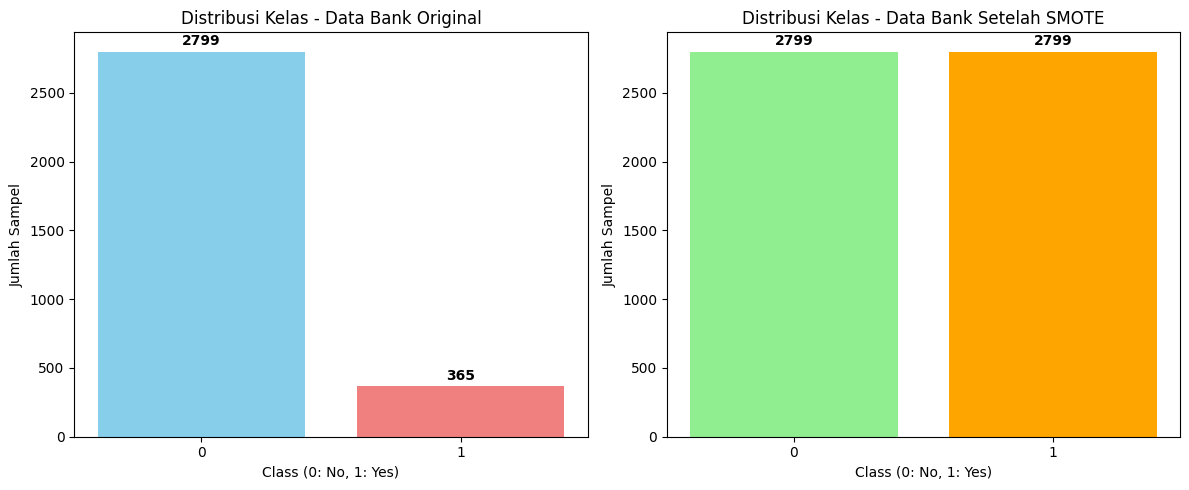

In [12]:
print("PERSIAPAN DATA BANK UNTUK KLASIFIKASI NAIVE BAYES")

# Set random state untuk reproducibility
RANDOM_STATE = 42

# 1. Split data original (sebelum SMOTE)
print("\n1. Data Bank Original (Sebelum SMOTE):")
X_train_bank_orig, X_test_bank_orig, y_train_bank_orig, y_test_bank_orig = train_test_split(
    X_bank, y_bank, test_size=0.3, random_state=RANDOM_STATE, stratify=y_bank
)

print(f"   - Total sampel: {len(X_bank)}")
print(f"   - Jumlah fitur: {X_bank.shape[1]}")
print(f"   - Distribusi kelas original: {dict(Counter(y_bank))}")
print(f"   - Training set: {X_train_bank_orig.shape[0]} sampel")
print(f"   - Test set: {X_test_bank_orig.shape[0]} sampel")
print(f"   - Distribusi training: {dict(Counter(y_train_bank_orig))}")

# 2. Standarisasi features
scaler = StandardScaler()
X_train_bank_orig_scaled = scaler.fit_transform(X_train_bank_orig)
X_test_bank_orig_scaled = scaler.transform(X_test_bank_orig)

print(f"   - Features telah distandarisasi menggunakan StandardScaler")

# 3. Aplikasi SMOTE pada training data
print("\n2. Aplikasi SMOTE pada Data Bank:")
smote_bank = SMOTE(random_state=RANDOM_STATE, k_neighbors=5)
X_train_bank_smote, y_train_bank_smote = smote_bank.fit_resample(X_train_bank_orig_scaled, y_train_bank_orig)

print(f"   - Distribusi sebelum SMOTE: {dict(Counter(y_train_bank_orig))}")
print(f"   - Distribusi setelah SMOTE: {dict(Counter(y_train_bank_smote))}")
print(f"   - Jumlah sampel setelah SMOTE: {len(X_train_bank_smote)}")
print(f"   - Peningkatan sampel: {len(X_train_bank_smote) - len(X_train_bank_orig)} sampel baru")

# 4. Visualisasi perbandingan distribusi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribusi original
original_counts = Counter(y_train_bank_orig)
ax1.bar(original_counts.keys(), original_counts.values(), color=['skyblue', 'lightcoral'])
ax1.set_title('Distribusi Kelas - Data Bank Original')
ax1.set_xlabel('Class (0: No, 1: Yes)')
ax1.set_ylabel('Jumlah Sampel')
ax1.set_xticks([0, 1])
for i, v in enumerate(original_counts.values()):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

# Plot distribusi setelah SMOTE
smote_counts = Counter(y_train_bank_smote)
ax2.bar(smote_counts.keys(), smote_counts.values(), color=['lightgreen', 'orange'])
ax2.set_title('Distribusi Kelas - Data Bank Setelah SMOTE')
ax2.set_xlabel('Class (0: No, 1: Yes)')
ax2.set_ylabel('Jumlah Sampel')
ax2.set_xticks([0, 1])
for i, v in enumerate(smote_counts.values()):
    ax2.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Klasifikasi Naive Bayes pada Data Bank Original

**Evaluasi performa Naive Bayes** pada dataset Bank Marketing yang **belum diseimbangkan**:

### **Tantangan pada Dataset Bank**:
1. **Class Imbalance**: Kemungkinan mayoritas nasabah tidak subscribe (class 0)
2. **Mixed Features**: Kombinasi numerical dan categorical features
3. **Business Context**: False Negative (miss potential customer) vs False Positive (waste marketing effort)
4. **Real-world Complexity**: Lebih challenging dibanding Iris dataset

### **Expected Challenges**:
- Bias terhadap majority class (likely "No" subscription)
- Lower recall pada minority class ("Yes" subscription)
- Need for balanced evaluation metrics

KLASIFIKASI NAIVE BAYES PADA DATA BANK ORIGINAL (SEBELUM SMOTE)

HASIL EVALUASI MODEL PADA DATA BANK ORIGINAL:
Overall Accuracy:  0.8261 (82.61%)
Overall Precision: 0.8487 (84.87%)
Overall Recall:    0.8261 (82.61%)
Overall F1-Score:  0.8362 (83.62%)

PERFORMA PER CLASS:
  No (0):
    Precision: 0.9192 (91.92%)
    Recall:    0.8809 (88.09%)
    F1-Score:  0.8997 (89.97%)
  Yes (1):
    Precision: 0.3058 (30.58%)
    Recall:    0.4038 (40.38%)
    F1-Score:  0.3481 (34.81%)


CLASSIFICATION REPORT DETAIL:
                  precision    recall  f1-score   support

 No Subscription       0.92      0.88      0.90      1201
Yes Subscription       0.31      0.40      0.35       156

        accuracy                           0.83      1357
       macro avg       0.61      0.64      0.62      1357
    weighted avg       0.85      0.83      0.84      1357

CONFUSION MATRIX:


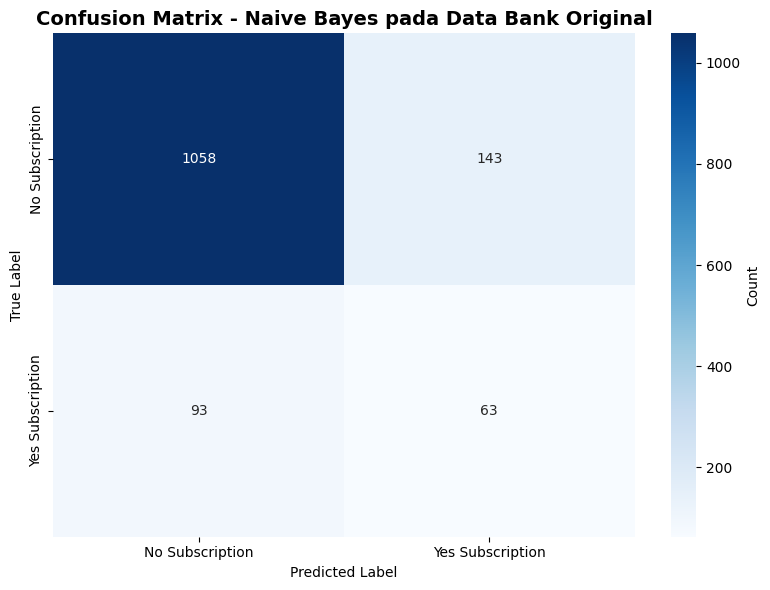

In [14]:
print("KLASIFIKASI NAIVE BAYES PADA DATA BANK ORIGINAL (SEBELUM SMOTE)")

# 1. Inisialisasi dan training model Naive Bayes
nb_bank_original = GaussianNB()
nb_bank_original.fit(X_train_bank_orig_scaled, y_train_bank_orig)

# 2. Prediksi pada test set
y_pred_bank_orig = nb_bank_original.predict(X_test_bank_orig_scaled)

# 3. Evaluasi performa
accuracy_bank_orig = accuracy_score(y_test_bank_orig, y_pred_bank_orig)
precision_bank_orig = precision_score(y_test_bank_orig, y_pred_bank_orig, average="weighted")
recall_bank_orig = recall_score(y_test_bank_orig, y_pred_bank_orig, average="weighted")
f1_bank_orig = f1_score(y_test_bank_orig, y_pred_bank_orig, average="weighted")

# Evaluasi per class untuk analisis yang lebih detail
precision_per_class = precision_score(y_test_bank_orig, y_pred_bank_orig, average=None)
recall_per_class = recall_score(y_test_bank_orig, y_pred_bank_orig, average=None)
f1_per_class = f1_score(y_test_bank_orig, y_pred_bank_orig, average=None)

print(f"\nHASIL EVALUASI MODEL PADA DATA BANK ORIGINAL:")
print(f"Overall Accuracy:  {accuracy_bank_orig:.4f} ({accuracy_bank_orig*100:.2f}%)")
print(f"Overall Precision: {precision_bank_orig:.4f} ({precision_bank_orig*100:.2f}%)")
print(f"Overall Recall:    {recall_bank_orig:.4f} ({recall_bank_orig*100:.2f}%)")
print(f"Overall F1-Score:  {f1_bank_orig:.4f} ({f1_bank_orig*100:.2f}%)")

print(f"\nPERFORMA PER CLASS:")
class_names = ['No (0)', 'Yes (1)']
for i, class_name in enumerate(class_names):
    print(f"  {class_name}:")
    print(f"    Precision: {precision_per_class[i]:.4f} ({precision_per_class[i]*100:.2f}%)")
    print(f"    Recall:    {recall_per_class[i]:.4f} ({recall_per_class[i]*100:.2f}%)")
    print(f"    F1-Score:  {f1_per_class[i]:.4f} ({f1_per_class[i]*100:.2f}%)")

print(f"\n\nCLASSIFICATION REPORT DETAIL:")
print(classification_report(y_test_bank_orig, y_pred_bank_orig, 
                          target_names=['No Subscription', 'Yes Subscription']))

# 4. Confusion Matrix
print("CONFUSION MATRIX:")
cm_bank_orig = confusion_matrix(y_test_bank_orig, y_pred_bank_orig)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_bank_orig,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['No Subscription', 'Yes Subscription'],
    yticklabels=['No Subscription', 'Yes Subscription'],
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix - Naive Bayes pada Data Bank Original", 
          fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 5. Analisis business impact
true_positives = cm_bank_orig[1, 1]
false_negatives = cm_bank_orig[1, 0]
false_positives = cm_bank_orig[0, 1]
true_negatives = cm_bank_orig[0, 0]

## Klasifikasi Naive Bayes pada Data Bank SMOTE

**Evaluasi performa Naive Bayes** pada dataset Bank Marketing yang **sudah diseimbangkan dengan SMOTE**:

### **Expected Improvements dengan SMOTE**:
1. **Balanced Learning**: Model akan belajar dari jumlah sampel yang seimbang
2. **Better Minority Class Detection**: Peningkatan recall untuk "Yes Subscription"
3. **Reduced Bias**: Kurang bias terhadap majority class
4. **Business Value**: Lebih baik dalam mendeteksi potential customers

### **Potential Trade-offs**:
- Kemungkinan sedikit penurunan overall accuracy
- Peningkatan false positives (more marketing efforts)
- But significant improvement dalam detecting true subscribers

KLASIFIKASI NAIVE BAYES PADA DATA BANK SMOTE (SETELAH SMOTE)

HASIL EVALUASI MODEL PADA DATA BANK SMOTE:
Overall Accuracy:  0.6942 (69.42%)
Overall Precision: 0.8713 (87.13%)
Overall Recall:    0.6942 (69.42%)
Overall F1-Score:  0.7486 (74.86%)

PERFORMA PER CLASS:
  No (0):
    Precision: 0.9538 (95.38%)
    Recall:    0.6878 (68.78%)
    F1-Score:  0.7992 (79.92%)
  Yes (1):
    Precision: 0.2363 (23.63%)
    Recall:    0.7436 (74.36%)
    F1-Score:  0.3586 (35.86%)


CLASSIFICATION REPORT DETAIL:
                  precision    recall  f1-score   support

 No Subscription       0.95      0.69      0.80      1201
Yes Subscription       0.24      0.74      0.36       156

        accuracy                           0.69      1357
       macro avg       0.60      0.72      0.58      1357
    weighted avg       0.87      0.69      0.75      1357

CONFUSION MATRIX:


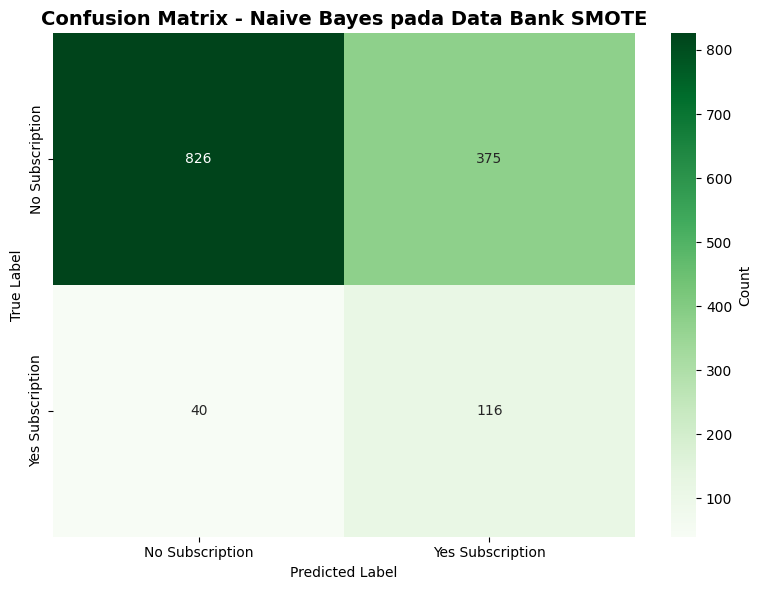

In [16]:
print("KLASIFIKASI NAIVE BAYES PADA DATA BANK SMOTE (SETELAH SMOTE)")

# 1. Inisialisasi dan training model Naive Bayes pada data SMOTE
nb_bank_smote = GaussianNB()
nb_bank_smote.fit(X_train_bank_smote, y_train_bank_smote)

# 2. Prediksi pada test set (menggunakan test set yang sama untuk perbandingan fair)
y_pred_bank_smote = nb_bank_smote.predict(X_test_bank_orig_scaled)

# 3. Evaluasi performa
accuracy_bank_smote = accuracy_score(y_test_bank_orig, y_pred_bank_smote)
precision_bank_smote = precision_score(y_test_bank_orig, y_pred_bank_smote, average="weighted")
recall_bank_smote = recall_score(y_test_bank_orig, y_pred_bank_smote, average="weighted")
f1_bank_smote = f1_score(y_test_bank_orig, y_pred_bank_smote, average="weighted")

# Evaluasi per class
precision_per_class_smote = precision_score(y_test_bank_orig, y_pred_bank_smote, average=None)
recall_per_class_smote = recall_score(y_test_bank_orig, y_pred_bank_smote, average=None)
f1_per_class_smote = f1_score(y_test_bank_orig, y_pred_bank_smote, average=None)

print(f"\nHASIL EVALUASI MODEL PADA DATA BANK SMOTE:")
print(f"Overall Accuracy:  {accuracy_bank_smote:.4f} ({accuracy_bank_smote*100:.2f}%)")
print(f"Overall Precision: {precision_bank_smote:.4f} ({precision_bank_smote*100:.2f}%)")
print(f"Overall Recall:    {recall_bank_smote:.4f} ({recall_bank_smote*100:.2f}%)")
print(f"Overall F1-Score:  {f1_bank_smote:.4f} ({f1_bank_smote*100:.2f}%)")

print(f"\nPERFORMA PER CLASS:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}:")
    print(f"    Precision: {precision_per_class_smote[i]:.4f} ({precision_per_class_smote[i]*100:.2f}%)")
    print(f"    Recall:    {recall_per_class_smote[i]:.4f} ({recall_per_class_smote[i]*100:.2f}%)")
    print(f"    F1-Score:  {f1_per_class_smote[i]:.4f} ({f1_per_class_smote[i]*100:.2f}%)")

print(f"\n\nCLASSIFICATION REPORT DETAIL:")
print(classification_report(y_test_bank_orig, y_pred_bank_smote,
                          target_names=['No Subscription', 'Yes Subscription']))

# 4. Confusion Matrix
print("CONFUSION MATRIX:")
cm_bank_smote = confusion_matrix(y_test_bank_orig, y_pred_bank_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_bank_smote,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=['No Subscription', 'Yes Subscription'],
    yticklabels=['No Subscription', 'Yes Subscription'],
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix - Naive Bayes pada Data Bank SMOTE", 
          fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 5. Analisis business impact
true_positives_smote = cm_bank_smote[1, 1]
false_negatives_smote = cm_bank_smote[1, 0]
false_positives_smote = cm_bank_smote[0, 1]
true_negatives_smote = cm_bank_smote[0, 0]